In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y_true = make_blobs(
    n_samples=500,
    centers=5,
    cluster_std=1.2,
    random_state=42
)

print("Dataset shape:", X.shape)

Dataset shape: (500, 2)


In [ ]:
from scipy.spatial.distance import cdist

# Random initialization of centroids
def initialize_centroids(X, K):
    random_idx = np.random.choice(X.shape[0], K, replace=False)
    return X[random_idx]

# Assign each point to nearest centroid
def assign_clusters(X, centroids):
    distances = cdist(X, centroids, metric='euclidean')
    return np.argmin(distances, axis=1)

# Update centroids by computing mean
def update_centroids(X, labels, K):
    new_centroids = []
    for i in range(K):
        cluster_points = X[labels == i]
        new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)

# Check convergence
def check_convergence(old_centroids, new_centroids, tol=1e-4):
    shift = np.linalg.norm(old_centroids - new_centroids, axis=1)
    return np.all(shift < tol)

# K-Means main function
def kmeans(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)

    for iteration in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, K)

        if check_convergence(centroids, new_centroids):
            print(f"Converged at iteration {iteration}")
            break

        centroids = new_centroids

    return centroids, labels

In [ ]:
K = 5
final_centroids, cluster_labels = kmeans(X, K)

print("Final centroids:\n", final_centroids)

Converged at iteration 1
Final centroids:
 [[-2.67080982  9.04638273]
 [-7.14837082 -5.89823299]
 [-8.93543662  7.4028391 ]
 [ 3.47541508  3.18206109]
 [-6.68772239 -7.82884225]]


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, cluster_labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5933765814069255


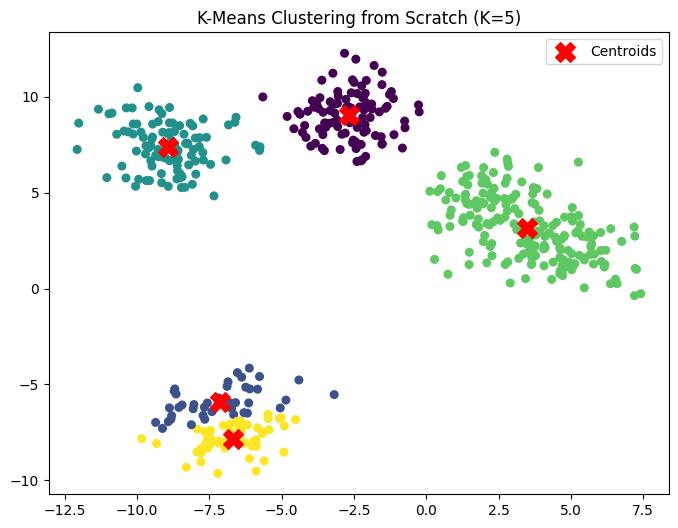

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering from Scratch (K=5)")
plt.legend()
plt.show()